In [11]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Dhruv\scikit_learn_data


In [8]:
oliv.data.shape

(400, 4096)

In [10]:
oliv.images.shape

(400, 64, 64)

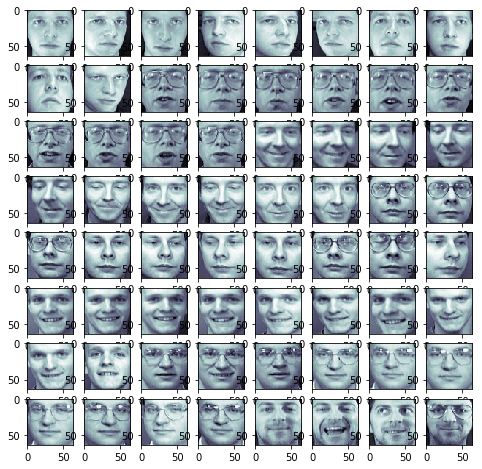

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap= plt.cm.bone)
plt.show()

In [17]:
x = oliv.data
y = oliv.target

In [50]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.components_.shape
pca.explained_variance_.shape

(400,)

In [52]:
k=0
covariencetaken=0
total = pca.explained_variance_.sum()
while covariencetaken/total <0.95:
    covariencetaken += pca.explained_variance_[k]
    k +=1
k

123

In [53]:
pca = PCA(n_components=k)
transfromed_x = pca.fit_transform(x)
transfromed_x.shape

(400, 123)

In [54]:
approx_x = pca.inverse_transform(transfromed_x)
approx_x.shape
approx_images = approx_x.reshape((400,64,64))

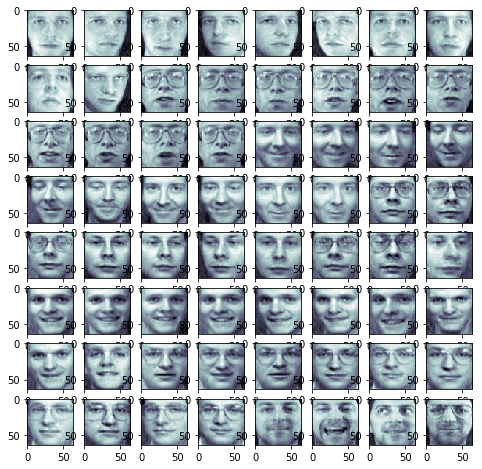

In [56]:
fig2 = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig2.add_subplot(8,8,i+1)
    ax.imshow(approx_images[i], cmap= plt.cm.bone)
plt.show()

In [60]:
eigenv = pca.components_
eigenv.shape
eigenfaces = eigenv.reshape((123,64,64))

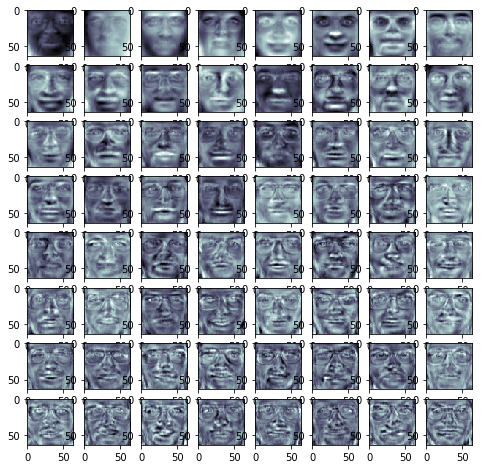

In [61]:
fig2 = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig2.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i], cmap= plt.cm.bone)
plt.show()